# Assignment 2: Neural Networks and Optimization

## Part 1: Linear Regression vs. Neural Network

For this assignment, we will be using the concrete example from yellowbrick. We will be evaluating how well neural networks perform compared to linear regression.

### Step 0: Import Libraries

In [1]:
!pip install yellowbrick --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### Step 1: Data Input (2 marks)

The data used for this task can be imported using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

*Note: the yellowbrick library is not included in the default Anaconda installation, so you will need to install it*

In [3]:
# TO DO: Import concrete dataset from yellowbrick library (0.5 marks)
from yellowbrick.datasets.loaders import load_concrete

# TO DO: Print size and type of X and y (0.5 marks)
X, y = load_concrete()

print("X size:", X.shape)
print("X type:", type(X))

print("y size:", y.shape)
print("y type:", type(y))

X size: (1030, 8)
X type: <class 'pandas.core.frame.DataFrame'>
y size: (1030,)
y type: <class 'pandas.core.series.Series'>


In [4]:
# TO DO: Inspect the first few columns of the imported feature matrix (0.5 marks)
X.head()

,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [5]:
# TO DO: Use .describe() to inspect the mean and variance of each feature (0.5 marks)
print("mean\n", X.describe().loc['mean'], "\n")
print("variance\n", X.describe().loc['std'] ** 2)  # var = (std)^2

mean
 cement    281.165631
slag       73.895485
ash        54.187136
water     181.566359
splast      6.203112
coarse    972.918592
fine      773.578883
age        45.662136
Name: mean, dtype: float64 

variance
 cement    10921.742654
slag       7444.083725
ash        4095.548093
water       456.060245
splast       35.682602
coarse     6045.656228
fine       6428.099159
age        3990.437729
Name: std, dtype: float64


### Step 2: Data Processing (2 marks)

Check if there are any missing values and fill them in if necessary. Remove any non-numeric columns.

In [6]:
# TO DO: Process the data - fill-in any missing values and remove any non-numeric columns (0.5 marks)
print(X.isna().sum(), "\n")  # Amount of NaN in features
print(y.isna().sum())        # 0 NaN values means no missing values present

# No NaN values present, all values are numeric, so no data processing is needed

cement    0
slag      0
ash       0
water     0
splast    0
coarse    0
fine      0
age       0
dtype: int64 

0


You can add the target vector and the feature matrix together and inspect the relationship between the features and target using a `pairplot()`

In [7]:
# TO DO: Add the target vector and the feature matrix together (0.5 marks)
df = pd.concat([X, y.rename("target")], axis=1)
df.shape

(1030, 9)

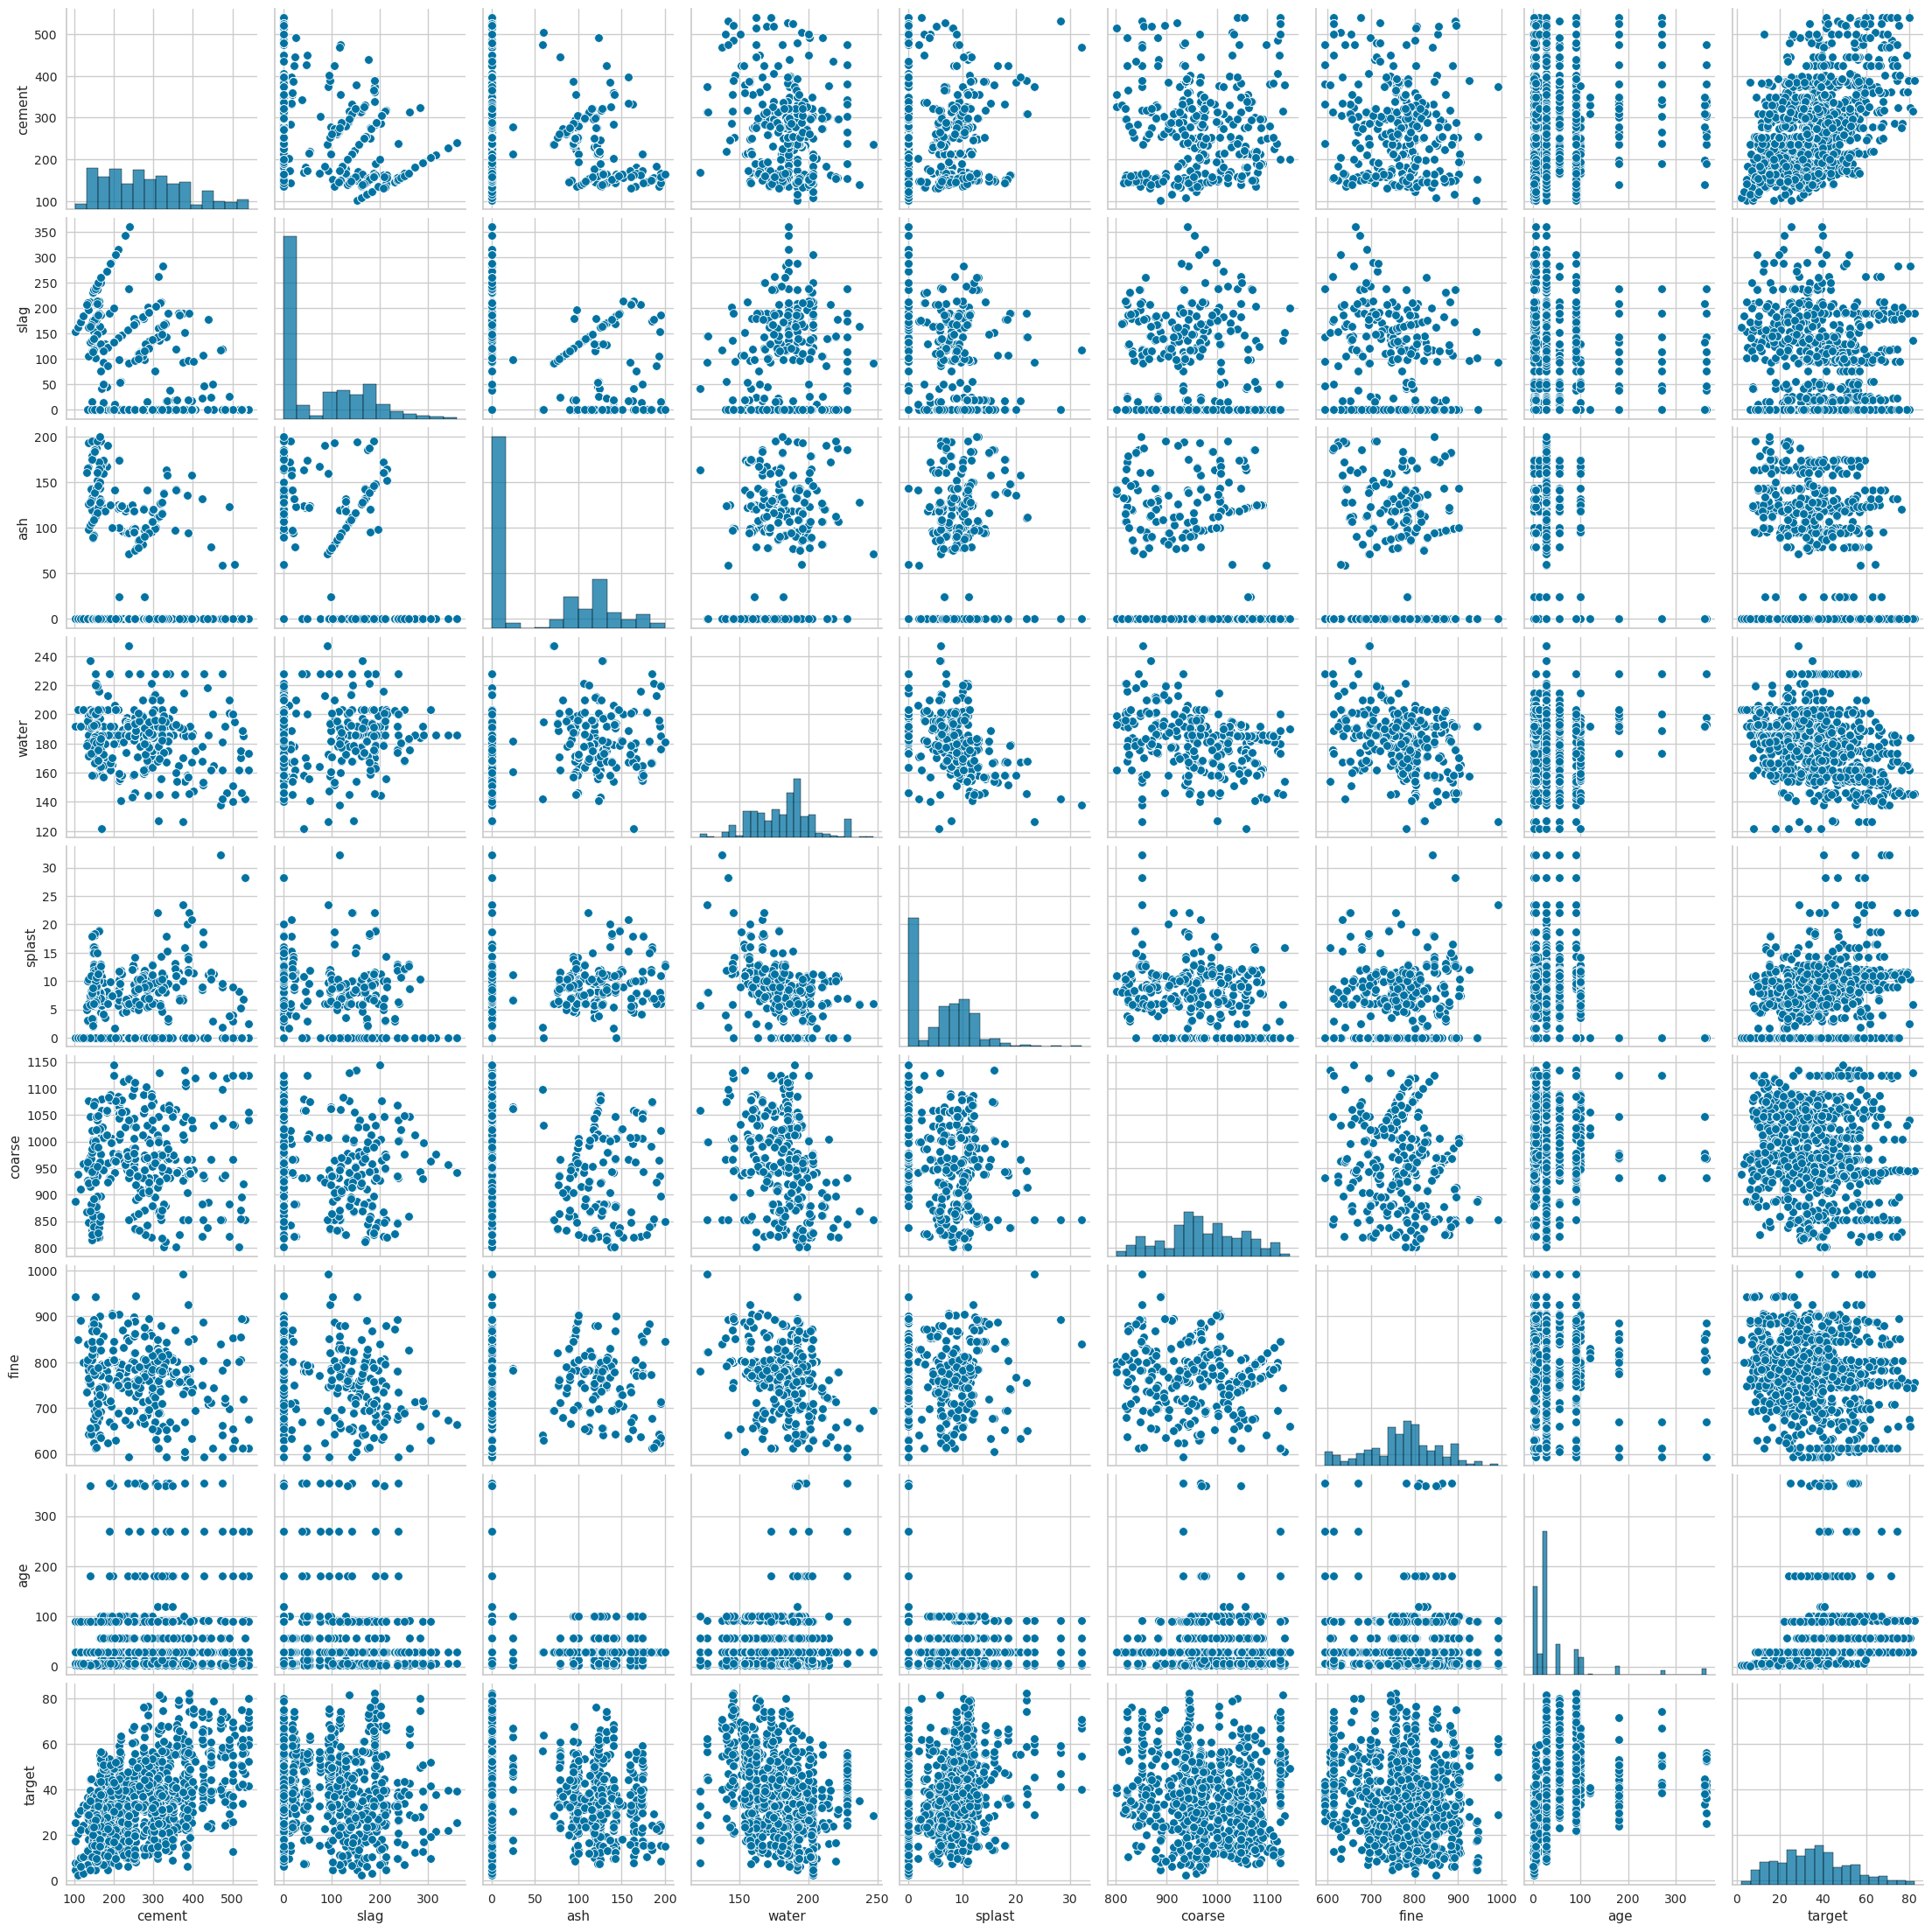

In [8]:
# TO DO: Use pairplot() (0.5 marks)
sns.pairplot(df)
plt.show()

The concrete data is already be split into the feature matrix and target vector. The next step is to split the data into training and testing subsets. For this assignment, you can use `train_test_split()` with `random_state=0`

In [9]:
# TO DO: Split the data into training and testing data (0.5 marks)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  # Splitting data

Looking at the mean and variance of the dataset, it is clear that the features have a wide range of values. You can use the code below to scale the feature matrix

*Note: `StandardScaler()` scales the data to a mean of 0 and a variance of 1*

In [10]:
from sklearn.preprocessing import StandardScaler

# Scale Train and Test Values
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

### Step 3: Implement Machine Learning Model (2 marks)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`
3. Implement the machine learning model with the scaled data

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_scaled, y_train)

LinearRegression()

### Step 4: Validate Model (3 marks)

Calculate the training and validation accuracy using mean squared error.

In [12]:
from sklearn.metrics import mean_squared_error

# Training
y_train_pred = lr.predict(train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)  # MSE
r2_train = 1 - (mse_train / np.var(y_train))           # Accuracy from MSE

# Validation
y_test_pred = lr.predict(test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = 1 - (mse_test / np.var(y_test))

# r^2 = 1 - (RSS / TSS) = 1 - (MSE / var(y))
# RSS = n * MSE
# TSS = var(y) / n
# https://en.wikipedia.org/wiki/Coefficient_of_determination
# https://en.wikipedia.org/wiki/Variance#Population_variance

In [13]:
# TO DO: Print the results (1 mark)
print("Training MSE:", mse_train)
print("Testing MSE: ", mse_test, "\n")

print("Training score:", r2_train)
print("Testing score: ", r2_test)

Training MSE: 111.35843861132469
Testing MSE:  95.90413603680642 

Training score: 0.6108229424520553
Testing score:  0.6234144623633329


## Part B: Neural Network

Now we will repeat the above analysis using a neural network. For this assignment, we will be using the PyTorch library.

In [14]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

### Step 2: Data Processing (2 marks)

To make this analysis easier, we can convert the data into tensors.

In [15]:
# TO DO: Convert training and testing data to tensors (1 mark)
X_train = torch.tensor(train_scaled).float()
y_train = torch.tensor(y_train.to_numpy()).float()

X_test = torch.tensor(test_scaled).float()
y_test = torch.tensor(y_test.to_numpy()).float()

# Turn Train and Test Tensors to Datasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset  = TensorDataset(X_test, y_test)

# https://docs.pytorch.org/docs/stable/index.html

In [16]:
# TO DO: Print the size of the training features and labels (1 mark)
print("Features size:", X_train.shape)
print("Labels size:", y_train.shape)

Features size: torch.Size([772, 8])
Labels size: torch.Size([772])


The labels must be changed from a vector to a 2-D array to make sure that the math works properly. Use the provided code below to fix this issue:

In [17]:
y_train = y_train.unsqueeze(1)
y_test = y_test.unsqueeze(1)
print(y_train.size())

torch.Size([772, 1])


### Step 3: Implement Neural Network (10 marks)

For this assignment, we will use the SGD optimizer with the following parameters:
- Initial learning rate = 0.001
- Momentum = 0.9

We will use the same learning rate schedule that was used in the Backpropagation Example on D2L.

For the optimization process, we will need to both train and test the data for each epoch. It is up to you how you want to organize your code for this process. You will need to include the following steps:
- Load your data using the `DataLoader()`
- Define a model with two hidden layers with 50 hidden units each
- Choose your loss function
- initialize your optimizer
- Set up your training and testing loops for 100 epochs
    - Remember that you must go through the training and testing code for each epoch sequentially
- Print out the average training and testing loss for each epoch (or plot in graph)

In [18]:
# Class for Creating Models
class NeuralNetwork(nn.Module):
    def __init__(self, i, h, o):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(i, h),  # Connect i input Layers to h Hidden Layers
            nn.ReLU(),        # Activation Function
            nn.Linear(h, h),  # Connect h Hidden Layers to h Hidden Layers
            nn.ReLU(),
            nn.Linear(h, o)   # Connect h Hidden Layers to o Output Layers
        )

    def forward(self, x):     # Forward Pass
        return self.model(x)  # Pass x Through Layers

# Function to Train Model
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()                # Training Mode
    train_loss = 0.0
    for X, y in dataloader:
        pred = model(X)          # Make a Prediction
        y = y.view(-1, 1)        # Reshape Labels
        loss = loss_fn(pred, y)  # Calculate Loss

        optimizer.zero_grad()  # Reset Gradients
        loss.backward()        # Determine new Gradients
        optimizer.step()       # Update Weights

        train_loss += loss.item() * len(y)           # Batch Loss
    avg_loss = train_loss / len(dataloader.dataset)  # Compute Average Loss
    return avg_loss

# Function to Test Model
def test_loop(dataloader, model, loss_fn):
    model.eval()           # Testing Mode
    test_loss = 0.0
    with torch.no_grad():  # No Gradients Computed
        for X, y in dataloader:
            pred = model(X)
            y = y.view(-1, 1)
            loss = loss_fn(pred, y)
            test_loss += loss.item() * len(y)
    avg_loss = test_loss / len(dataloader.dataset)
    return avg_loss

In [19]:
# Code for Neural Network Using SGD Optimizer
from torch.optim.lr_scheduler import StepLR

# Load in Training and Testing Data
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader  = DataLoader(test_dataset, batch_size=32)

# Input, Hidden, Output
D_i, D_h, D_o = X_train.shape[1], 50, 1

# Define Models
model_SGD  = NeuralNetwork(D_i, D_h, D_o)
model_Adam = NeuralNetwork(D_i, D_h, D_o)

# Define Loss Criterion
criterion = nn.MSELoss()

# Define Optimizers
optimizer_SGD  = torch.optim.SGD(model_SGD.parameters(), lr=0.001, momentum=0.9)
optimizer_Adam = torch.optim.Adam(model_Adam.parameters(), lr=0.01)

# Define Schedulers
scheduler_SGD  = StepLR(optimizer_SGD, step_size=10, gamma=0.5)
scheduler_Adam = StepLR(optimizer_Adam, step_size=10, gamma=0.5)

In [20]:
# Set Number of Epochs
epochs = 100

# Empty Lists to Store Loss Values
train_SGD, test_SGD = [], []
train_Adam, test_Adam = [], []

# Loop to Train and Test Models over a set Number of Epochs
for epoch in range(epochs):
    # SGD
    train_loss_SGD = train_loop(train_dataloader, model_SGD, criterion, optimizer_SGD)  # Train Model Using SGD Model and SGD Optimizer
    test_loss_SGD  = test_loop(test_dataloader, model_SGD, criterion)                   # Test Model Using SGD Model
    train_SGD.append(train_loss_SGD)  # Add the Current Epochs Train Loss to List
    test_SGD.append(test_loss_SGD)    # Add the Current Epochs Test Loss to List
    scheduler_SGD.step()              # Update Learning Rate Using SGD Scheduler

    # Adam
    train_loss_Adam = train_loop(train_dataloader, model_Adam, criterion, optimizer_Adam)
    test_loss_Adam  = test_loop(test_dataloader, model_Adam, criterion)
    train_Adam.append(train_loss_Adam)
    test_Adam.append(test_loss_Adam)
    scheduler_Adam.step()

In [24]:
# Print Every 10th Training and Testing Loss
print("SGD Optimizer:")
for epoch in range(0, epochs, 10):
    print(f"Epoch {epoch}: Train loss = {train_SGD[epoch]:.2f}, Test loss = {test_SGD[epoch]:.2f}")
print(f"Epoch {epochs - 1}: Train loss = {train_SGD[-1]:.2f}, Test loss = {test_SGD[-1]:.2f}")

print("\nAdam Optimizer:")
for epoch in range(0, epochs, 10):
    print(f"Epoch {epoch}: Train loss = {train_Adam[epoch]:.2f}, Test loss = {test_Adam[epoch]:.2f}")
print(f"Epoch {epochs - 1}: Train loss = {train_Adam[-1]:.2f}, Test loss = {test_Adam[-1]:.2f}")

SGD Optimizer:
Epoch 0: Train loss = 849.95, Test loss = 633.55
Epoch 10: Train loss = 44.59, Test loss = 44.70
Epoch 20: Train loss = 24.87, Test loss = 31.99
Epoch 30: Train loss = 21.12, Test loss = 32.79
Epoch 40: Train loss = 19.76, Test loss = 32.02
Epoch 50: Train loss = 18.99, Test loss = 31.66
Epoch 60: Train loss = 18.74, Test loss = 31.42
Epoch 70: Train loss = 18.55, Test loss = 31.49
Epoch 80: Train loss = 18.48, Test loss = 31.52
Epoch 90: Train loss = 18.42, Test loss = 31.48
Epoch 99: Train loss = 18.41, Test loss = 31.57

Adam Optimizer:
Epoch 0: Train loss = 918.71, Test loss = 327.83
Epoch 10: Train loss = 62.78, Test loss = 60.80
Epoch 20: Train loss = 41.98, Test loss = 46.06
Epoch 30: Train loss = 37.25, Test loss = 42.04
Epoch 40: Train loss = 35.60, Test loss = 41.22
Epoch 50: Train loss = 34.39, Test loss = 40.71
Epoch 60: Train loss = 34.07, Test loss = 40.14
Epoch 70: Train loss = 33.86, Test loss = 40.17
Epoch 80: Train loss = 33.75, Test loss = 39.97
Epoch 

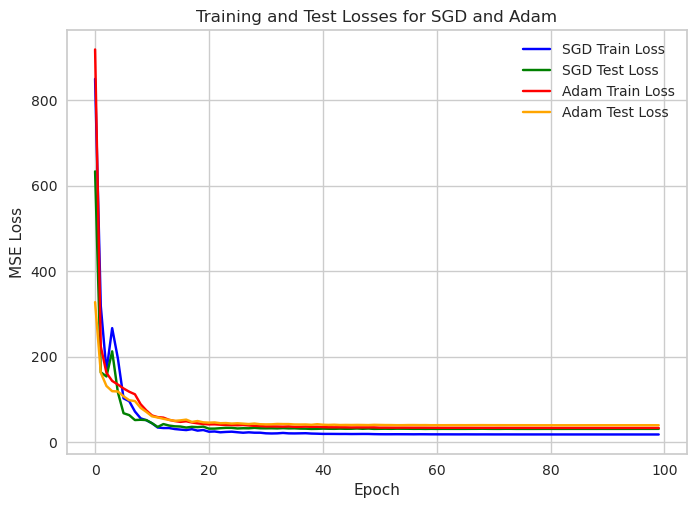

In [22]:
# Graph and Compare the Losses of Different Optimization Methods
x = range(epochs)

# SGD Losses
plt.plot(x, train_SGD, label='SGD Train Loss', color='blue')
plt.plot(x, test_SGD, label='SGD Test Loss', color='green')

# Adam Losses
plt.plot(x, train_Adam, label='Adam Train Loss', color='red')
plt.plot(x, test_Adam, label='Adam Test Loss', color='orange')

plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Test Losses for SGD and Adam')
plt.legend()
plt.grid(True)
plt.show()

### Questions (6 marks)
1. How did the results from the linear model compare to the results from the neural network? Why do you think one performed better than the other?
   - When comparing the results using the Concrete dataset, we see that the Neural Network models trained with both SGD and Adam outperform the Linear Regression model in terms of both training and testing loss. Linear Regression had a training MSE of about 111 and a testing MSE of around 96, whereas the Neural Network with SGD achieved a training loss of about 18 and a test loss of around 32, and with Adam a training loss of approximately 34 and a test loss of about 40. This indicates that the Neural Network captures more complex patterns in the data, allowing it to generalize better despite the relatively small dataset. Due to the number of neurons, hidden layers, and non-linear activations that neural networks have, these models can capture more complex relationships in the data that a model like Linear Regression otherwise could not.
1. If you run the optimization/backpropagation code multiple times, you will see that you get different loss values. Why is this?
   - When the optimization and backpropagation process is ran multiple times, the resulting loss values can be seen being slightly different between runs. This occurs due to two factors, with the first being that since the data loader is written with shuffle=True, the order of the training samples changes every time the model is trained. This affects how the gradients are computed and slightly changes the path the optimizer takes towards the minimum. Second, the models weights are randomly initialized at the start of each training run. Because each initialization starts the optimization from a different point, the model reaches to slightly different solutions. With these two factors, the final loss values vary within a certain range even though the overall performance remains consistent across runs.
1. Compare the results from SGD to using Adam with default parameters and a constant learning rate of 0.01. Which model would you select to use and why?
   - Comparing SGD to Adam, we observe that both optimizers enable the Neural Network to perform well, with SGD reaching a final training loss of about 18 and a test loss of around 32, whereas Adam stabilizes at a training loss of approximately 34 and a test loss of about 40. These results show that SGD achieves a slightly lower final loss, whereas Adam converges faster and stabilizes earlier during training. Both optimizers produce models that outperform Linear Regression and the choice between them depends on the specific goal. If faster convergence is preferred, then Adam would be more suitable, but if achieving the lowest possible test loss is the main objective, SGD would be the better choice. Overall, the Neural Network trained with either optimizer performs better on this dataset and captures more complex relationships.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
   - For this assignment, the code written was sourced from multiple places which include lecture notes, examples posted on D2L, along with the PyTorch docs. I also used Wikipedia to understand the relationship between mean squared error and R^2 score, helping me to implement it correctly. Using these resources, such as "PyTorch Tutorial" or the "Backpropagation Example", helped me to understand how Neural Networks are setup and what the expected ouputs are, allowing me to compare the various models.
1. In what order did you complete the steps?
   - The steps in this assignment were completed in order, in which I initially worked through the linear regression "To Dos", then worked through the Neural Network steps using SGD. I did have to rewrite some of my code to be cleaner when asked to compare SGD vs Adam, where I used a class to create Neural Networks instead of a standalone model. However, this was a simple change to make as I had a references to compare to.
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
   - Throughout the assignment, I did use generative AI, specifically ChatGPT to help me understand some of the concepts covered in this assignment. By asking questions like "what does loss.backward() specifically do?" and "What happens when we don't scale our data in a Neural Network", helped me to further my understanding of the concepts covered. Questions like these and the answers provided, allowed me to understand deeper the various parts of a Neural Network and the building blocks that make it up.
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
   - Overall, throughout this assignment I did not face any major challenges. This is because I could reference examples posted on D2L and work through them to understand how Neural Networks function. Using the notes as well, helped me understand the different components to Neural Networks and in what order to build them in. With these two resources alone, the assignment was great in helping me apply what was learnt in lectures to a problem we have not seen.

Sources
```
https://en.wikipedia.org/wiki/Coefficient_of_determination
https://en.wikipedia.org/wiki/Variance#Population_variance
https://docs.pytorch.org/docs/stable/index.html
```

## Part 2: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.
  - This assignment was great for reinforcing concepts from ENSF 444 while introducing Neural Networks. I found it interesting how versatile Neural Networks can be, even when the results are not always optimal and I look forward to learning more about them.